In [1]:
import norm_heatmap
import normalize
import experiment_normalized_depth_loss
import agg_depth_loss
import depth_loss
import tools
import graph_tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import heatmap_workflow_tools as hwt
import os

## 1. Adjust Variables as Necessary

In [2]:
stack_dir = os.path.abspath("D:/Work_Experience/Franco_Lab/data/hmp_paper/hsp90_3NT56/P2X7/")
norm_dir = os.path.abspath("D:/Work_Experience/Franco_Lab/data/hmp_paper/hsp90_3NT56/Phalloidin/")
slice_depth = 0.79
monolayer_num_slices = 15

In [3]:
stack_name = os.path.basename(stack_dir)
norm_name = os.path.basename(norm_dir)
base_dir = os.path.basename(os.path.dirname(norm_dir))
out_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..', 'hmp_paper_data'))
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
out_dir = os.path.join(out_dir, f"{base_dir}_{stack_name}n{norm_name}_out")
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

## Getting raw heatmap

In [4]:
stack_tiffs = tools.get_files(stack_dir)

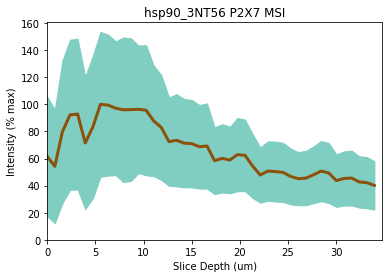

In [5]:
stack_means = np.array([])
stack_stds = np.array([])
for img in stack_tiffs:
    mean, std = normalize.tiff_mean_std(img, 0, -1, True, 0)
    stack_means = np.append(stack_means, mean)
    stack_stds = np.append(stack_stds, std)
hwt.plot_MSI(stack_means, stack_stds, slice_depth,
             f"{base_dir} {stack_name} MSI",
             os.path.join(out_dir, f"{base_dir}_{stack_name}_MSI.png"))

In [6]:
imgs = norm_heatmap.stack(stack_tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7...
Completing post-processing for z, x and y composite(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7...


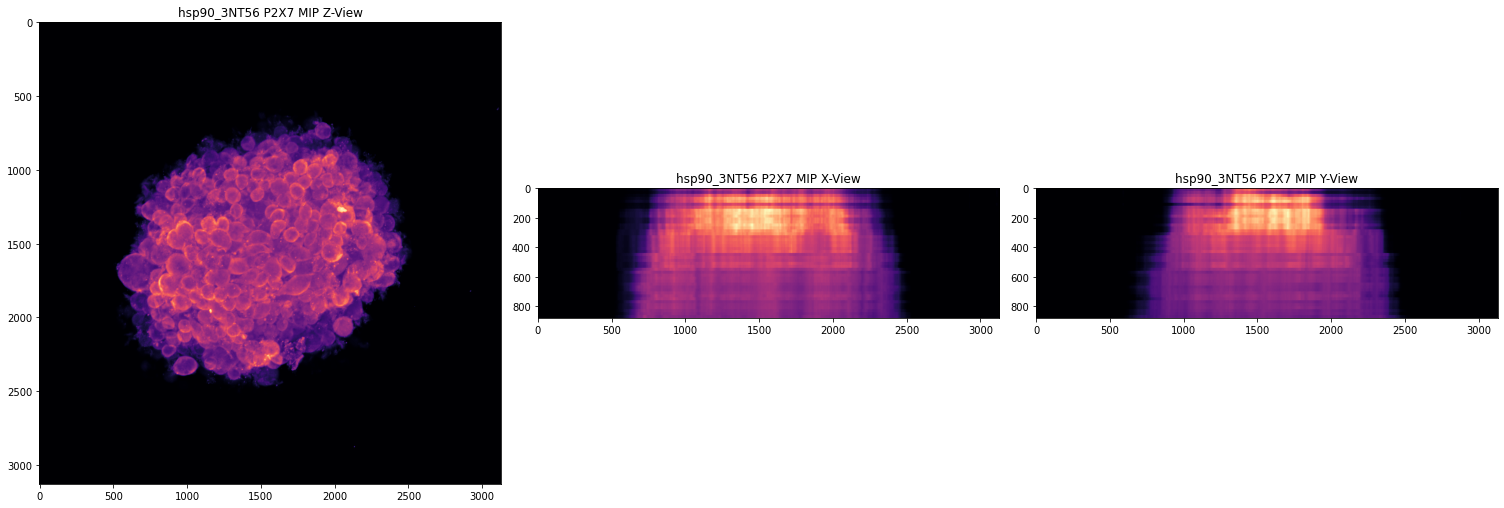

In [7]:
hwt.plot_MIP(imgs, f"{base_dir} {stack_name}", os.path.join(out_dir, f"{base_dir}_{stack_name}_MIP.png"))

## Getting normalized heatmap

In [8]:
norm_tiffs = tools.get_files(norm_dir)

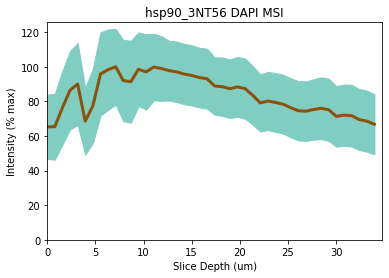

In [9]:
norm_means = np.array([])
norm_stds = np.array([])
for norm_tiff in norm_tiffs:
    mean, std = normalize.tiff_mean_std(norm_tiff, 0, -1, True, 0)
    norm_means = np.append(norm_means, mean)
    norm_stds = np.append(norm_stds, std)
hwt.plot_MSI(norm_means, norm_stds, slice_depth,
             f"{base_dir} {norm_name} MSI",
             os.path.join(out_dir, f"{base_dir}_{norm_name}_MSI.png"))

In [10]:
%%capture
norm_stack_tiffs = normalize.mean_normalizer(stack_tiffs, norm_tiffs, 0, -1, True, False)

Folder already found at D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_DAPI. Should normalized TIFs be regenerated (1-y; 0-n)?  1


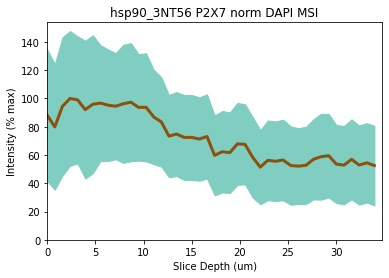

In [11]:
norm_stack_means = np.array([])
norm_stack_stds = np.array([])
for norm_stack_tiff in norm_stack_tiffs:
    mean, std = normalize.tiff_mean_std(norm_stack_tiff, 0, -1, True, 0)
    norm_stack_means = np.append(norm_stack_means, mean)
    norm_stack_stds = np.append(norm_stack_stds, std)
hwt.plot_MSI(norm_stack_means, norm_stack_stds, slice_depth,
             f"{base_dir} {stack_name} norm {norm_name} MSI",
             os.path.join(out_dir, f"{base_dir}_{stack_name}n{norm_name}_MSI.png"))

In [12]:
imgs = norm_heatmap.stack(norm_stack_tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_DAPI...
Completing post-processing for z, x and y composite(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_DAPI...


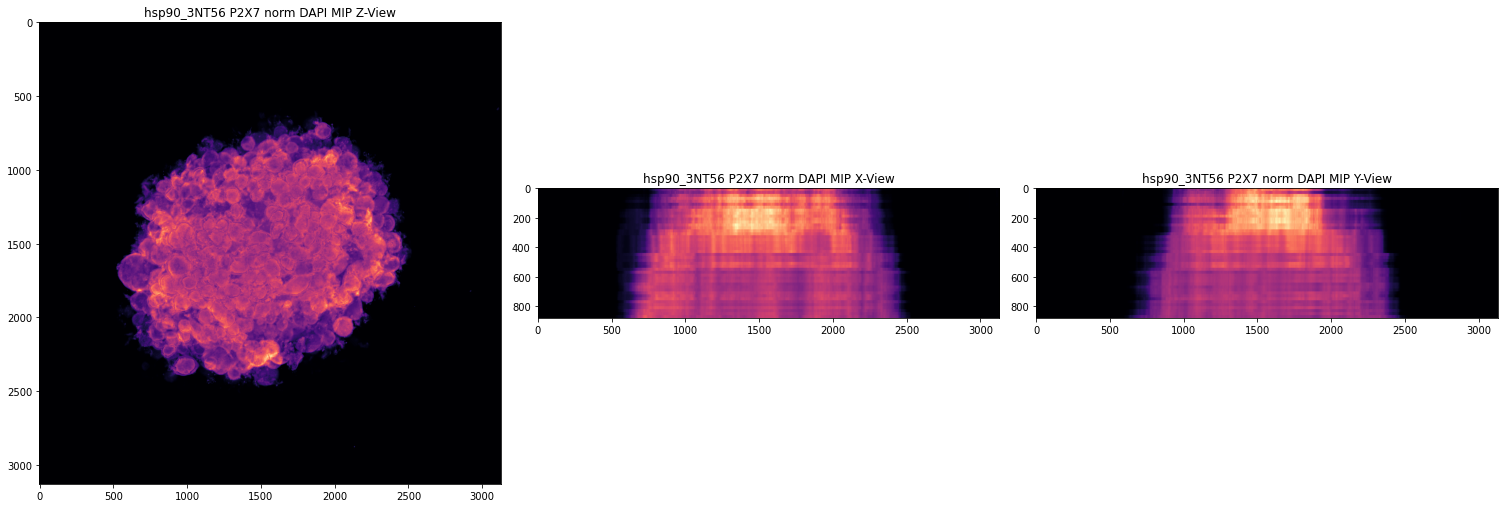

In [13]:
hwt.plot_MIP(imgs, f"{base_dir} {stack_name} norm {norm_name}", os.path.join(out_dir, f"{base_dir}_{stack_name}n{stack_name}_MIP.png"))

### Normalizing heatmap with tumoroid boundary

In [14]:
#getting mask/boundary...
mask = normalize.get_norm_bool_idxs(norm_tiffs, monolayer_num_slices / len(norm_tiffs))

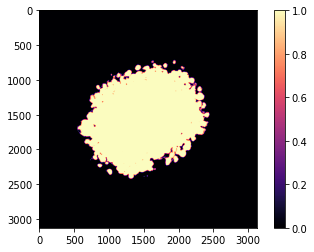

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
im = ax1.imshow(mask, cmap = 'magma')
plt.colorbar(im)

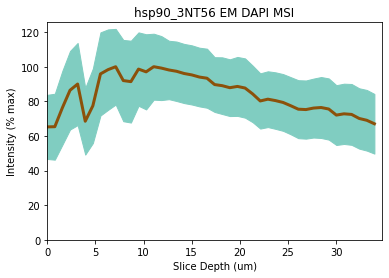

In [16]:
norm_means_EM = np.array([])
norm_stds_EM = np.array([])
for norm_tiff in norm_tiffs:
    mean, std = normalize.tiff_mean_std(norm_tiff, 0, -1, True, mask)
    norm_means_EM = np.append(norm_means_EM, mean)
    norm_stds_EM = np.append(norm_stds_EM, std)
hwt.plot_MSI(norm_means_EM, norm_stds_EM, slice_depth,
             f"{base_dir} EM {norm_name} MSI",
             os.path.join(out_dir, f"{base_dir}_EM_{norm_name}_MSI.png"))


In [17]:
%%capture
norm_stack_tiffs_EM = normalize.mean_normalizer(stack_tiffs, norm_tiffs, 0, -1, True, True)

Folder already found at D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_im_DAPI. Should normalized TIFs be regenerated (1-y; 0-n)?  1


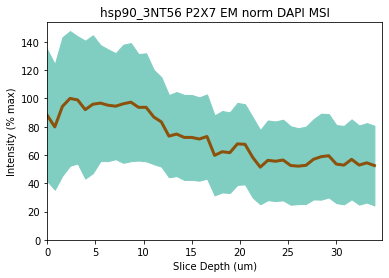

In [18]:
norm_stack_means_EM = np.array([])
norm_stack_stds_EM = np.array([])
for norm_stack_tiff_EM in norm_stack_tiffs_EM:
    mean, std = normalize.tiff_mean_std(norm_stack_tiff_EM, 0, -1, True, 0)
    norm_stack_means_EM = np.append(norm_stack_means_EM, mean)
    norm_stack_stds_EM = np.append(norm_stack_stds_EM, std)
hwt.plot_MSI(norm_stack_means, norm_stack_stds, slice_depth,
             f"{base_dir} {stack_name} EM norm {norm_name} MSI",
             os.path.join(out_dir, f"{base_dir}_{stack_name}EMn{norm_name}_MSI.png"))

In [19]:
imgs = norm_heatmap.stack(norm_stack_tiffs_EM, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_im_DAPI...
Completing post-processing for z, x and y composite(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_im_DAPI...


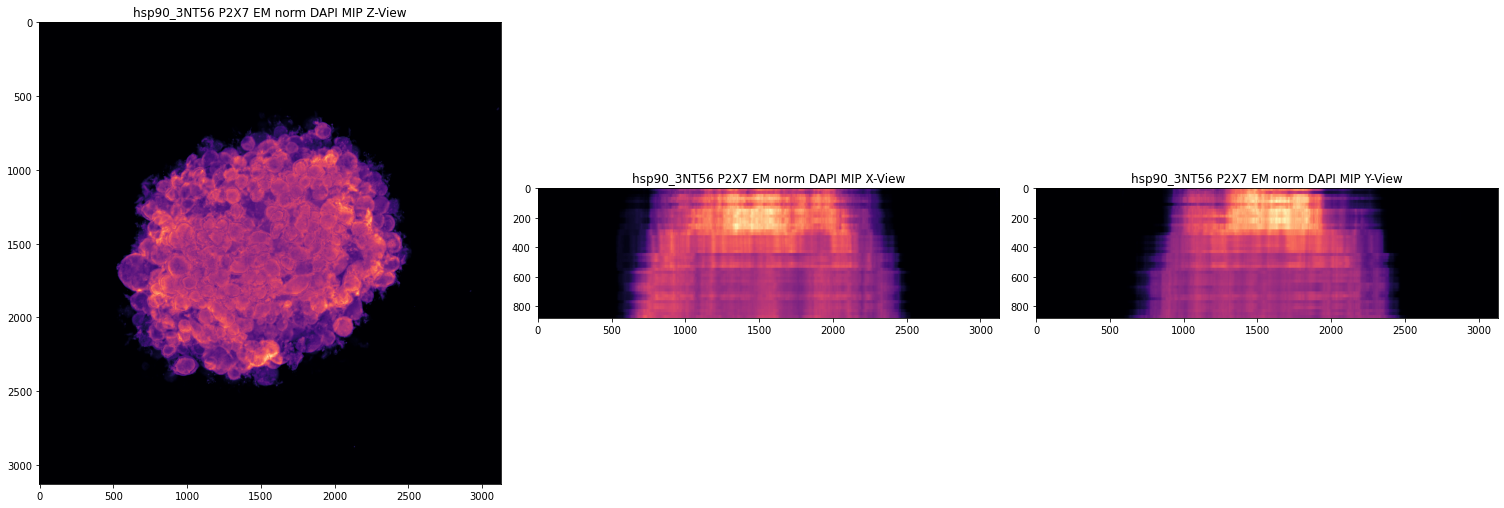

In [20]:
hwt.plot_MIP(imgs, f"{base_dir} {stack_name} EM norm {norm_name}", os.path.join(out_dir, f"{base_dir}_{stack_name}EMn{stack_name}_MIP.png"))

In [25]:
def percentage(arr):
    return arr / np.max(arr) * 100

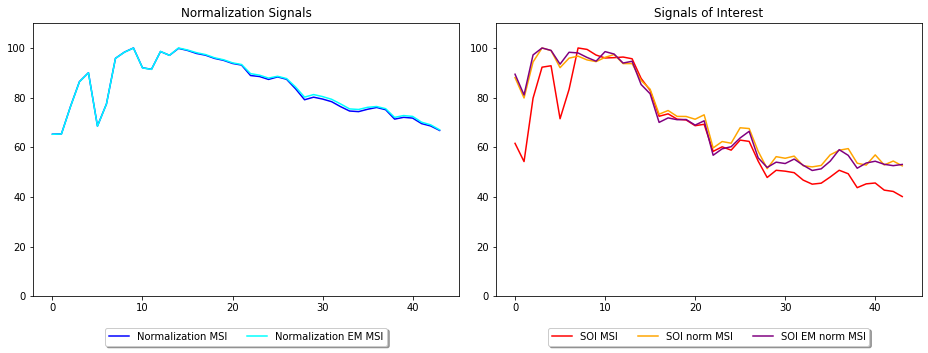

In [60]:
xvals = np.arange(0, len(stack_tiffs))
fig = plt.figure(figsize = (13, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xvals, percentage(norm_means), label = "Normalization MSI", color = "blue")
ax1.plot(xvals, percentage(norm_means_EM), label = "Normalization EM MSI", color = "cyan")
# ax1.plot(xvals, percentage(norm_norm_means), label = "Normalization Stack Self-Normalized", color = "purple")
ax1.set_ylim((0, 110))
ax1.set_title("Normalization Signals")
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -.2),
           ncol=3, fancybox=True, shadow=True)
ax2.plot(xvals, percentage(stack_means), label = "SOI MSI", color = "red")
ax2.plot(xvals, percentage(norm_stack_means), label = "SOI norm MSI", color = "orange")
ax2.plot(xvals, percentage(norm_stack_means_EM), label = "SOI EM norm MSI", color = "purple")
ax2.set_ylim((0, 110))
ax2.set_title("Signals of Interest")
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -.2),
           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()